In [ ]:
!pip install gensim

방법1

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
##1000건의 데이터
#file = r'C:\Users\user\ohg\in_data\중학생+질문 20201005-1(질문).csv'

#84460건의 데이터
file = r'C:\Users\user\ohg\in_data\중학생+질문 20201202(QA).csv'
df = pd.read_csv(file) 
train_data = df = pd.read_csv(file) 


In [3]:
# 데이터건수 출력
print(len(train_data))
# NULL 값 존재 유무
print(train_data.isnull().values.any())

84460
False


In [5]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['question'] = train_data['question'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [6]:
print(train_data)

                date                                           question  \
0       2020.10.02.   차 재난지원금 중학생 질문이용 제가 광주광역시 중학생입니다 북구 신용중인데 차 재난...   
1       2020.02.06.   중학생 인강 질문 질문  중학생 과목별 인강 추천해주세요 질문  인강으로 어떻게 공...   
2       2020.04.05.   인천서구정신건강복지센터 중학생 질문  중학생이고 이시국에 가도 되나요 정신적으로 문...   
3       2020.02.13.   중학생이 쌍수 질문 드립니다  전문인분들 제 질문에 자세히 답 좀 부탁드려요 ㅜㅁㅜ...   
4       2020.06.02.   예비 중학생 질문 내공냠냠튀면 신고요 저 예비 중학생인데 제가 낯가림도 심하고 적응...   
...              ...                                                ...   
84455   2017.10.25.   중학생 냉 질염 질문  그래서 요즘 자주 팬티가 축축해요ㅜㅠ 질문은 냉 어떻게 할까...   
84456   2019.12.05.   중학생인데 눈위치에 의문을 가져 질문를 올려봅니다 제가 거울을 보거나 카메라 셀카모...   
84457   2017.03.26.   중학생염색 질문 중학생 어제도 물어봤는데 오늘또 물어봅니다 중학생이고 방학이에요 이...   
84458   2008.08.18.   예비중학생 준비물 질문 안녕하세요 올해 살인 초딩입니다ㅇㅇ 반년만 지나면 중학생이 ...   
84459   2009.12.10.    예비 중학생의 질문   고민끝에 지식인에 질문하게 됐네요 최대한 성의껏해주세요  ...   

                                                  answer  \
0      위의 보건복지부 보도참고자료(9.22 발표)에 나와 있듯이

In [7]:
# 불용어 정의 및 가져오기
stopwords = open("./stopword/stopword.txt", encoding = "UTF8").read()
print(stopwords)

﻿중학생
질문
제
좀
요
때
저
답변
내공
이제
중
지금
가지
추천
전
것
뭐
정도
이번
대해
이
올해
가요
그냥
하나요
답
안
날
요즘
곳
해
더
번
막
곧
성의껏
애
거
일단
꼭
현재
정말
조금
저희
한번
보통
참고
부탁
또
등
관련
지식인
거기
쪽
게
몇개
무엇
이면
제일
데
예
진짜
우선
저가
등등
해도
여러가지
혹시
거의
이구
원래
혹시
뭔가
몇
고요
만약
헤헤
약간
때문
가장
여기
별로
고
존나
죄송
흣
아시
대답
못
성심
대부분
쫌
를
내
헤
살짝
먼저
다시
호호
뭘
과
자주
다음
미래
여러분
얼마나
이상
자신
우리
아주
꽤
무슨
동안
겸
평소
새끼
어제
모두
전체
그때
자기
하자
웬만큼
오
쯤
무쟈
나중
내일
법좀
대충
얘
주로
처
왜
처럼
갑자기
나
외
제발
정성껏
전혀
래서
네
부쩍
그때되
요기
어디가
하이
옛날
점점
뎅
아마
잠깐
만쿤
것습니
후기
비롯
함
서로
이건
한가지
각각
겉
다음주
저녁
관해
이요
몇시
답좀
아예
짓
그다음
무척
떈
가튼뎁
대략
뇬
우린
웃
땐
그거
겹
모든
확
안녕
전부
이예
밨
간다
무조건
따라서
한편
제대로
이쯤
며칠
체적
그게
요약
건가
떄문












In [8]:
# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()
tokenized_data = []
for sentence in train_data['question']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    #temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
print('총 샘플 수 :',len(tokenized_data))

총 샘플 수 : 84460


질문의 최대 길이 : 52
질문의 평균 길이 : 36.72153682216434


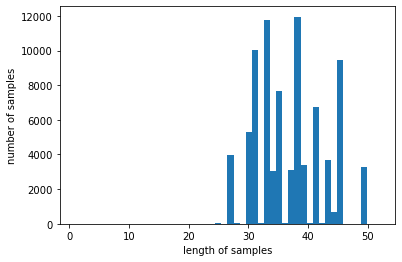

In [35]:
# 질문 길이 분포 확인
print('질문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('질문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [36]:
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [37]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(1245, 100)

In [38]:
print(model.wv.most_similar("교복"))

[('입다', 0.29871687293052673), ('따다', 0.2822904586791992), ('눈', 0.2617693841457367), ('가나', 0.25258153676986694), ('선호', 0.24061694741249084), ('완젼', 0.2327723503112793), ('웹툰', 0.2326330542564392), ('위치', 0.23237599432468414), ('걸', 0.22605106234550476), ('마이', 0.22544187307357788)]


In [39]:
print(model.wv.most_similar("친구"))

[('언니', 0.7902485132217407), ('친하다', 0.784408688545227), ('와', 0.7740681767463684), ('선생님', 0.7522331476211548), ('한테', 0.7382252216339111), ('과목', 0.7365961074829102), ('이나', 0.7333923578262329), ('배우다', 0.7278238534927368), ('되어다', 0.7238489389419556), ('초등학생', 0.7136223316192627)]


In [40]:
print(model)

Word2Vec(vocab=1245, size=100, alpha=0.025)


In [45]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('./question_w2v') # 모델 저장


In [42]:
loaded_model = KeyedVectors.load_word2vec_format("./question_w2v") # 모델 로드

In [47]:
!python -m gensim.scripts.word2vec2tensor --input question_w2v --output question_w2v

2020-12-10 21:10:06,275 - word2vec2tensor - INFO - running C:\Users\user\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input question_w2v --output question_w2v
2020-12-10 21:10:06,275 - utils_any2vec - INFO - loading projection weights from question_w2v
2020-12-10 21:10:06,484 - utils_any2vec - INFO - loaded (1245, 100) matrix from question_w2v
2020-12-10 21:10:06,622 - word2vec2tensor - INFO - 2D tensor file saved to question_w2v_tensor.tsv
2020-12-10 21:10:06,622 - word2vec2tensor - INFO - Tensor metadata file saved to question_w2v_metadata.tsv
2020-12-10 21:10:06,622 - word2vec2tensor - INFO - finished running word2vec2tensor.py


구글의 임베딩 프로젝터를 사용해서 워드 임베딩 모델을 시각화

In [ ]:
https://projector.tensorflow.org/

PCA , T-SNE

In [44]:
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 
plt.rc('font', family='D2Coding') 
def show_tsne(): 
    tsne = TSNE(n_components=2) 
    X = tsne.fit_transform(X_show) 
    
    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
    fig = plt.figure() 
    fig.set_size_inches(30, 20) 
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(df['x'], df['y']) 
    
    for word, pos in df.iterrows(): 
        ax.annotate(word, pos, fontsize=10) 
        
    plt.xlabel("t-SNE 특성 0") 
    plt.ylabel("t-SNE 특성 1") 
    plt.show() 
    
def show_pca(): 
    # PCA 모델을 생성합니다 
    pca = PCA(n_components=2) 
    pca.fit(X_show) 
    # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
    x_pca = pca.transform(X_show) 
    
    plt.figure(figsize=(30, 20)) 
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
    for i in range(len(X_show)): 
        plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), 
                 fontdict={'weight': 'bold', 'size': 9}) 
        plt.xlabel("첫 번째 주성분") 
        plt.ylabel("두 번째 주성분") 
        plt.show() 
        
        model_name = r'C:\Users\user\ohg\question_w2v' 
        model = KeyedVectors.load_word2vec_format(model_name) 
        
        vocab = list(model.wv.vocab) 
        X = model[vocab] 
        
        # sz개의 단어에 대해서만 시각화 
        sz = 800 
        X_show = X[:sz,:] 
        vocab_show = vocab[:sz] 
    show_tsne() 
    show_pca()

